### data-ber-10-19 Project 5: Statistical Analysis
#### House Prices: Advanced Regression Techniques (from kaggle)
The goal: Identify the most important features of houses that affect the sale prices.

In [1]:
# Import all the libraries that are necessary.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

%matplotlib inline
sns.set(style='ticks',
        palette='deep',
        font='sans-serif',
        font_scale=1.5,
        color_codes=True)

import warnings
warnings.filterwarnings('ignore')


In [2]:
# Open the train.csv file and name your dataset as df.

df = pd.read_csv("../data/house-prices-advanced-regression-techniques/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Check the column labels of the dataframe.

df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
# Print a concise summary of a dataframe. (including the index dtype,
#                                          column dtypes,
#                                          non-null values,
#                                          memory usage.)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
# Return the sum of the missing values detected and define as null_cols.
# Print the column labels with missing values greater than 0 and check.

null_cols = df.isnull().sum()
null_cols[null_cols > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
# Check the values of the each columns identified in the previous cell.


# df["LotFrontage"].value_counts() # keep
# df["Alley"].value_counts() # drop # Grvl 50, Pave 41, ["Street"] dulplication
# df["Street"].value_counts() # ref
# df["FireplaceQu"].value_counts() # keep
# df["Fireplaces"].value_counts() # ref
# df["PoolQC"].value_counts() # drop
# df["Fence"].value_counts() # drop
# df["MiscFeature"].value_counts() # drop

In [7]:
# Determines the level of missing values to drop.

null_cols[null_cols > 0] / len(df)

LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [8]:
# Define the level of missing values as null_perc.
# Define the column labels to drop as to_drop.
# Print and check the columns labels to drop.

null_perc = null_cols[null_cols > 0] / len(df)
to_drop = null_perc[null_perc > .8].index # I decided to drop columns with more than 80% missing values.
to_drop

Index(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [9]:
# Drop the columns identified in the previous cell.
# Redefine the dataframe dropping unnecessary columns as df.

df = df.drop(to_drop, axis=1)

In [10]:
# Return the sum of the missing values detected and define as null_cols.
# Print and check the column labels with missing values greater than 0.

df.isnull().sum()[df.isnull().sum() > 0]

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
FireplaceQu     690
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [11]:
# Make a copy of dataframe and define as df_2.

df_2 = df.copy()

In [12]:
# Define the column labels which data type is object among the dataframe df_2 as obj_cols.
# Print obj_cols and check the column labels

obj_cols = df_2.select_dtypes(['object']).columns
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [13]:
# Convert all columns identified in the previous cell to categorical type.

df_2[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
      'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
      'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
      'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
      'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
      'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
      'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
      'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']] = df_2[['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
                                                                        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
                                                                        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
                                                                        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
                                                                        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
                                                                        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                                                                        'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
                                                                        'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']].astype('category')

In [14]:
# Check the data type of the converted dataframe df_2.

df_2.dtypes

Id                  int64
MSSubClass          int64
MSZoning         category
LotFrontage       float64
LotArea             int64
Street           category
LotShape         category
LandContour      category
Utilities        category
LotConfig        category
LandSlope        category
Neighborhood     category
Condition1       category
Condition2       category
BldgType         category
HouseStyle       category
OverallQual         int64
OverallCond         int64
YearBuilt           int64
YearRemodAdd        int64
RoofStyle        category
RoofMatl         category
Exterior1st      category
Exterior2nd      category
MasVnrType       category
MasVnrArea        float64
ExterQual        category
ExterCond        category
Foundation       category
BsmtQual         category
BsmtCond         category
BsmtExposure     category
BsmtFinType1     category
BsmtFinSF1          int64
BsmtFinType2     category
BsmtFinSF2          int64
BsmtUnfSF           int64
TotalBsmtSF         int64
Heating     

In [15]:
# Define the column labels among the dataframe df_2 which data type is category as cat_cols.

cat_cols = df_2.select_dtypes(['category']).columns

In [16]:
# Return Series of codes with the index for cat_cols defined in the previous cell,
# and redefined as cat_cols of dataframe df_2.

# Since there is no cat.codes for dataframe,
# I applied lambda function to convert data type of multiple columns at once.

df_2[cat_cols] = df_2[cat_cols].apply(lambda x: x.cat.codes)

In [17]:
# Check again the data type of the converted dataframe df_2.

df_2.dtypes

Id                 int64
MSSubClass         int64
MSZoning            int8
LotFrontage      float64
LotArea            int64
Street              int8
LotShape            int8
LandContour         int8
Utilities           int8
LotConfig           int8
LandSlope           int8
Neighborhood        int8
Condition1          int8
Condition2          int8
BldgType            int8
HouseStyle          int8
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle           int8
RoofMatl            int8
Exterior1st         int8
Exterior2nd         int8
MasVnrType          int8
MasVnrArea       float64
ExterQual           int8
ExterCond           int8
Foundation          int8
BsmtQual            int8
BsmtCond            int8
BsmtExposure        int8
BsmtFinType1        int8
BsmtFinSF1         int64
BsmtFinType2        int8
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating             int8
HeatingQC           int8


In [18]:
# Check the correlation with each columns of the dataframe df_2 and define it as corr.
# Print and check the corr.

corr = df_2.corr()
corr

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,1.000000,0.011156,-0.006096,-0.010601,-0.033226,0.008916,0.032122,-0.019659,0.013324,0.049756,0.005847,-0.013735,-0.003815,0.001839,0.021912,0.018111,-0.028365,0.012609,-0.012713,-0.021998,0.038675,-0.022562,-0.034694,-0.042847,0.041925,-0.050298,0.001689,0.029826,0.008514,0.047012,0.008128,-0.021390,0.015973,-0.005024,0.038448,-0.005968,-0.007940,-0.015415,0.042120,0.002157,0.009821,0.032392,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,-0.004432,0.027239,-0.001064,-0.019772,-0.001108,0.003453,0.000072,0.000034,0.016570,0.017634,0.010732,0.005117,0.005971,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,0.019773,-0.005806,-0.021917
MSSubClass,0.011156,1.000000,0.035900,-0.386347,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,-0.005985,-0.024762,-0.042395,0.746063,0.397161,0.032628,-0.059316,0.027850,0.040581,-0.117817,-0.031336,-0.089159,-0.137229,-0.022693,0.022936,-0.017161,-0.003254,0.058126,-0.045282,-0.021027,-0.066625,0.008407,-0.069836,0.020935,-0.065649,-0.140759,-0.238518,0.048009,0.020760,-0.101774,0.049829,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.010129,0.040380,0.003711,-0.045569,-0.010293,0.063761,0.085072,-0.052038,-0.040110,-0.098672,-0.073844,-0.078145,-0.059925,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZoning,-0.006096,0.035900,1.000000,-0.111690,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,-0.249679,-0.027874,0.044606,0.005690,-0.105315,-0.160099,0.186951,-0.308908,-0.174728,-0.000301,0.005133,-0.008558,0.006963,0.004480,-0.067487,0.200536,-0.096041,-0.235174,0.102637,-0.017244,0.027356,0.017286,-0.049128,-0.032210,0.028086,-0.046749,-0.087834,0.056866,0.134279,-0.049523,-0.070196,-0.055614,-0.051481,0.011520,-0.082615,-0.018526,0.007193,-0.198290,-0.133876,-0.016471,0.049434,0.128976,-0.043200,-0.095722,-0.011349,-0.020596,0.093439,-0.275843,0.101357,-0.157042,-0.189250,-0.125427,-0.090149,-0.100366,-0.009477,-0.154704,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LotFrontage,-0.010601,-0.386347,-0.111690,1.000000,0.426095,-0.040886,-0.169641,-0.080757,NaN,-0.208276,0.088345,0.093003,-0.009254,0.003722,-0.448537,0.035502,0.251646,-0.059213,0.123349,0.088866,0.169799,0.095785,0.081271,0.107308,-0.025163,0.193458,-0.197128,0.052944,0.106156,-0.136918,0.061934,-0.108874,-0.011643,0.233633,-0.001135,0.049900,0.132644,0.392075,-0.022782,-0.088687,0.071659,0.064037,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,-0.200636,0.352096,0.033071,0.266639,0.208854,-0.192705,0.070250,-0.122743,0.285691,0.344997,0.117550,0.113702,0.094467,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,-0.034559,0.063372,0.351799
LotArea,-0.033226,-0.139781,-0.034452,0.426095,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,0.044569,0.023846,0.022164,-0.205721,-0.033190,0.105806,-0.005636,0.014228,0.013788,0.077054,0.149837,0.004256,

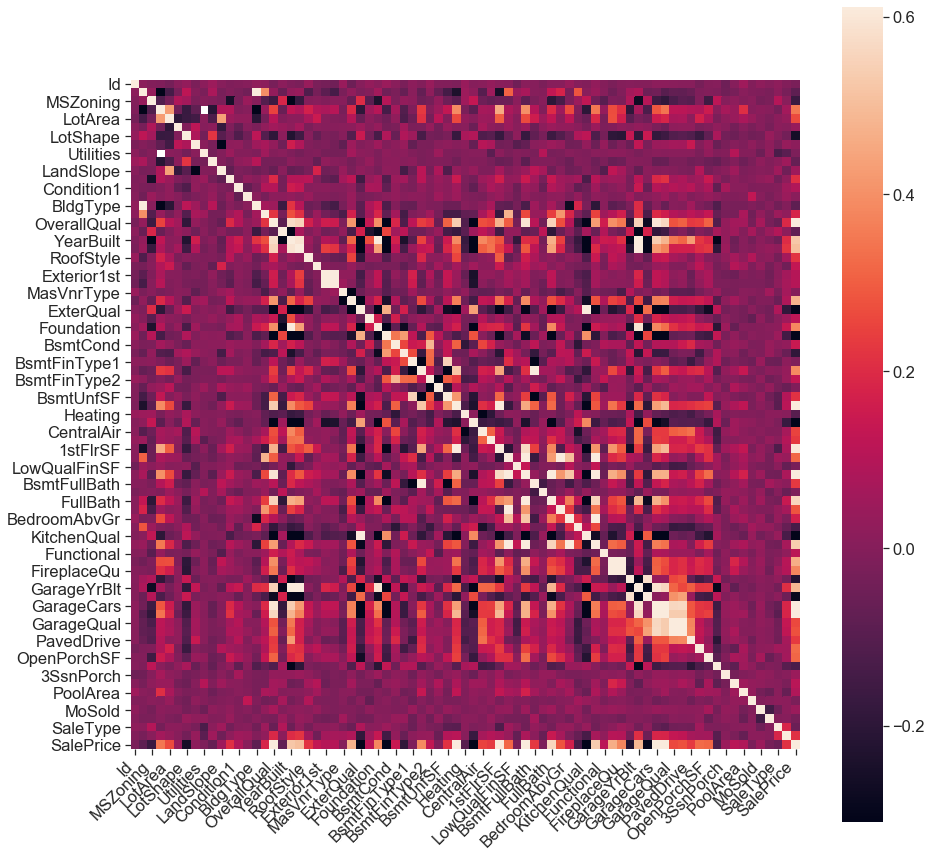

In [19]:
# Make a heatmap for corr defined in the previous cell.

fig, ax = plt.subplots(figsize=(15,15))

ax = sns.heatmap(corr,
                 robust=True,
                 square=True)

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment="right");

In [20]:
# Sort descending the index of absolute values of correlation with column 'SalePrice' and define as c_ix.
# Define the sorted columns as df_2_sorted.

c_ix = abs(df_2.corr()).sort_values('SalePrice', ascending=False).index
df_2_sorted = df_2.loc[:, c_ix]

In [21]:
c_ix

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'Fireplaces', 'BsmtQual', 'HeatingQC', 'BsmtFinSF1',
       'Foundation', 'FireplaceQu', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'GarageFinish', 'HalfBath', 'GarageCond', 'LotArea',
       'GarageQual', 'LotShape', 'CentralAir', 'Electrical', 'PavedDrive',
       'BsmtFullBath', 'GarageType', 'RoofStyle', 'BsmtUnfSF', 'SaleCondition',
       'Neighborhood', 'BsmtExposure', 'HouseStyle', 'BedroomAbvGr',
       'MSZoning', 'BsmtCond', 'KitchenAbvGr', 'RoofMatl', 'BsmtFinType2',
       'EnclosedPorch', 'ExterCond', 'Functional', 'ScreenPorch',
       'Exterior2nd', 'Exterior1st', 'Heating', 'PoolArea', 'Condition1',
       'BldgType', 'MSSubClass', 'OverallCond', 'LotConfig', 'SaleType',
       'LandSlope', 'MoSold', '3SsnPorch', 'S

In [22]:
# Check the order of the columns has changed well.

df_2_sorted.head(2)

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtQual,HeatingQC,BsmtFinSF1,Foundation,FireplaceQu,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,GarageFinish,HalfBath,GarageCond,LotArea,GarageQual,LotShape,CentralAir,Electrical,PavedDrive,BsmtFullBath,GarageType,RoofStyle,BsmtUnfSF,SaleCondition,Neighborhood,BsmtExposure,HouseStyle,BedroomAbvGr,MSZoning,BsmtCond,KitchenAbvGr,RoofMatl,BsmtFinType2,EnclosedPorch,ExterCond,Functional,ScreenPorch,Exterior2nd,Exterior1st,Heating,PoolArea,Condition1,BldgType,MSSubClass,OverallCond,LotConfig,SaleType,LandSlope,MoSold,3SsnPorch,Street,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,LandContour,Utilities,BsmtFinType1,BsmtFinSF2,Condition2,MasVnrType
0,208500,7,1710,2,2,548,856,856,2,2,8,2003,2003,2003.0,196.0,0,2,0,706,2,-1,65.0,0,854,61,1,1,4,8450,4,3,1,4,2,1,1,1,150,4,5,3,5,3,3,3,1,1,5,0,4,6,0,13,12,1,0,2,0,60,5,4,8,0,2,0,1,2008,0,1,0,0,3,0,2,0,2,1
1,181500,6,1262,2,3,460,1262,1262,3,2,6,1976,1976,1976.0,0.0,1,2,0,978,1,4,80.0,298,0,0,1,0,4,9600,4,3,1,4,2,0,1,1,284,4,24,1,2,3,3,3,1,1,5,0,4,6,0,8,8,1,0,1,0,20,8,2,8,0,5,0,1,2007,0,2,0,1,3,0,0,0,2,2


In [23]:
# Sort the values of SalePrice column in descending order and check the dataframe.

df_2_sorted.sort_values('SalePrice', ascending=False).head(10)

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtQual,HeatingQC,BsmtFinSF1,Foundation,FireplaceQu,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,GarageFinish,HalfBath,GarageCond,LotArea,GarageQual,LotShape,CentralAir,Electrical,PavedDrive,BsmtFullBath,GarageType,RoofStyle,BsmtUnfSF,SaleCondition,Neighborhood,BsmtExposure,HouseStyle,BedroomAbvGr,MSZoning,BsmtCond,KitchenAbvGr,RoofMatl,BsmtFinType2,EnclosedPorch,ExterCond,Functional,ScreenPorch,Exterior2nd,Exterior1st,Heating,PoolArea,Condition1,BldgType,MSSubClass,OverallCond,LotConfig,SaleType,LandSlope,MoSold,3SsnPorch,Street,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,LandContour,Utilities,BsmtFinType1,BsmtFinSF2,Condition2,MasVnrType
691,755000,10,4316,3,0,832,2444,2444,0,3,10,1994,1995,1994.0,1170.0,2,0,0,1455,2,0,104.0,382,1872,50,0,1,4,21535,4,0,1,4,2,0,1,1,989,4,15,1,5,4,3,3,1,7,5,0,4,6,0,6,6,1,0,2,0,60,6,0,8,0,1,0,1,2007,0,692,0,1,3,0,2,0,2,1
1182,745000,10,4476,3,2,813,2396,2411,0,3,10,1996,1996,1996.0,0.0,2,0,0,2096,2,4,160.0,171,2065,78,0,1,4,15623,4,0,1,4,2,1,1,3,300,0,15,0,5,4,3,3,1,1,5,0,4,6,0,7,13,1,555,2,0,60,5,0,8,0,7,0,1,2007,0,1183,0,0,3,0,2,0,2,2
1169,625000,10,3627,3,2,807,1930,1831,2,3,10,1995,1996,1995.0,1378.0,1,0,0,1387,2,4,118.0,361,1796,76,0,1,4,35760,4,0,1,4,2,1,1,3,543,4,15,1,5,4,3,3,1,1,5,0,2,6,0,6,6,1,0,2,0,60,5,1,8,0,7,0,1,2006,0,1170,0,0,3,0,2,0,2,1
898,611657,9,2364,3,0,820,2330,2364,0,2,11,2009,2010,2009.0,760.0,2,0,0,2188,2,2,100.0,0,0,67,0,1,4,12919,4,0,1,4,2,1,1,3,142,5,16,1,2,2,3,3,1,1,5,0,4,6,0,13,12,1,0,2,0,20,5,4,6,0,3,0,1,2010,0,899,0,0,3,0,2,0,2,3
803,582933,9,2822,3,0,1020,1734,1734,0,3,12,2008,2009,2009.0,424.0,1,0,0,0,2,2,107.0,52,1088,170,1,1,4,13891,4,3,1,4,2,0,3,3,1734,5,16,1,5,4,3,3,1,1,5,0,4,6,192,13,12,1,0,2,0,60,5,4,6,0,1,0,1,2009,0,804,0,0,3,0,5,0,2,3
1046,556581,9,2868,3,2,716,1992,1992,0,3,11,2005,2006,2005.0,208.0,1,0,0,240,2,2,85.0,214,876,108,0,1,4,16056,4,0,1,4,2,0,3,3,1752,5,22,0,5,4,3,3,1,1,5,0,4,6,0,5,5,1,0,2,0,60,5,4,6,0,7,0,1,2006,0,1047,0,0,3,0,2,0,2,3
440,555000,10,2402,3,0,672,3094,2402,0,2,10,2008,2008,2008.0,200.0,2,0,0,1767,2,2,105.0,0,0,72,0,0,4,15431,4,3,1,4,2,1,1,3,788,4,16,1,2,2,3,3,1,1,0,0,4,6,170,13,12,1,0,2,0,20,5,4,8,0,4,0,1,2009,0,441,0,0,3,0,2,539,2,3
769,538000,8,3279,3,0,841,1650,1690,0,3,12,2003,2003,2003.0,603.0,1,2,0,1416,2,2,47.0,503,1589,36,0,1,4,53504,4,1,1,4,2,1,3,3,234,4,22,1,5,4,3,3,1,1,5,0,4,4,210,15,5,1,0,2,0,60,5,1,8,1,6,0,1,2010,0,770,0,0,1,0,0,0,2,1
178,501837,9,2234,3,0,1166,2216,2234,0,2,9,2008,2009,2009.0,748.0,1,0,0,1904,2,2,63.0,0,0,60,0,0,4,17423,4,0,1,4,2,1,1,3,312,5,22,3,2,1,3,3,1,1,5,0,4,6,0,13,12,1,0,2,0,20,5,1,6,0,7,0,1,2009,0,179,0,0,3,0,2,0,2,3
798,485000,9,3140,3,0,820,1926,1966,0,3,11,2008,2009,2009.0,860.0,2,0,0,0,2,2,104.0,144,1174,78,0,1,4,13518,4,3,1,4,2,0,3,3,1926,5,16,3,5,4,3,3,1,1,5,0,4,6,0,13,12,1,0,2,0,60,5,4,6,0,7,0,1,2009,0,799,0,0,3,0,5,0,2,3


In [24]:
# Check the correlation with each columns of the dataframe df_2_sorted and redefine it as corr.
# Print and check the corr.

corr = df_2_sorted.corr()
corr

,SalePrice,OverallQual,GrLivArea,GarageCars,ExterQual,GarageArea,TotalBsmtSF,1stFlrSF,KitchenQual,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtQual,HeatingQC,BsmtFinSF1,Foundation,FireplaceQu,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,GarageFinish,HalfBath,GarageCond,LotArea,GarageQual,LotShape,CentralAir,Electrical,PavedDrive,BsmtFullBath,GarageType,RoofStyle,BsmtUnfSF,SaleCondition,Neighborhood,BsmtExposure,HouseStyle,BedroomAbvGr,MSZoning,BsmtCond,KitchenAbvGr,RoofMatl,BsmtFinType2,EnclosedPorch,ExterCond,Functional,ScreenPorch,Exterior2nd,Exterior1st,Heating,PoolArea,Condition1,BldgType,MSSubClass,OverallCond,LotConfig,SaleType,LandSlope,MoSold,3SsnPorch,Street,YrSold,LowQualFinSF,Id,MiscVal,BsmtHalfBath,LandContour,Utilities,BsmtFinType1,BsmtFinSF2,Condition2,MasVnrType
SalePrice,1.000000,0.790982,0.708624,0.640409,-0.636884,0.623431,0.613581,0.605852,-0.589189,0.560664,0.533723,0.522897,0.507101,0.486362,0.477493,0.466929,-0.438881,-0.400178,0.386420,0.382479,0.378377,0.351799,0.324413,0.319334,0.315856,-0.292483,0.284108,0.275781,0.263843,0.261347,-0.255580,0.251328,0.233919,0.231357,0.227122,-0.223819,0.222405,0.214479,0.213092,0.210851,-0.193079,0.180163,0.168213,-0.166872,0.147367,-0.135907,0.132383,0.130814,-0.128578,0.117303,0.115328,0.111447,0.103766,0.103551,-0.098812,0.092404,0.091155,-0.085591,-0.084284,-0.077856,-0.067396,-0.054911,0.051152,0.046432,0.044584,0.041036,-0.028923,-0.025606,-0.021917,-0.021190,-0.016844,0.015453,-0.014314,-0.013233,-0.011378,0.007513,-0.000488
OverallQual,0.790982,1.000000,0.593007,0.600671,-0.634319,0.562022,0.537808,0.476224,-0.555348,0.550600,0.427452,0.572323,0.550684,0.547766,0.411876,0.396765,-0.387637,-0.425944,0.239666,0.396186,0.350537,0.251646,0.238923,0.295493,0.308819,-0.275131,0.273458,0.303379,0.105806,0.280292,-0.190497,0.272038,0.255000,0.229393,0.111098,-0.213904,0.167677,0.308159,0.193703,0.196593,-0.118563,0.218440,0.101676,-0.160099,0.185615,-0.183882,0.074509,0.206772,-0.113937,0.138581,0.161047,0.064886,0.152396,0.161406,-0.112954,0.065166,0.100105,0.049834,0.032628,-0.091932,-0.031086,-0.060472,-0.066450,0.070815,0.030371,0.058823,-0.027347,-0.030429,-0.028365,-0.031406,-0.040150,0.028907,-0.001881,0.115691,-0.059119,0.014939,-0.016970
GrLivArea,0.708624,0.593007,1.000000,0.467247,-0.407642,0.468997,0.454868,0.566024,-0.381638,0.630012,0.825489,0.199010,0.287389,0.231197,0.390857,0.461679,-0.266890,-0.237985,0.208171,0.222982,0.402395,0.402797,0.247433,0.687501,0.330224,-0.189171,0.415772,0.165409,0.263116,0.143807,-0.175093,0.093666,0.126769,0.080195,0.034836,-0.111208,0.156707,0.240257,0.080729,0.148266,-0.029327,0.261380,0.521270,-0.082615,0.028480,0.100063,0.126744,0.072974,0.009113,0.042119,-0.054142,0.101510,0.067849,0.065613,-0.017124,0.170205,0.045133,-0.126975,0.074853,-0.079686,-0.089208,-0.041480,0.043860,0.050240,0.020643,0.044121,-0.036526,0.134683,0.008273,-0.002416,-0.018918,-0.068523,-0.008545,0.105833,-0.009640,0.025471,-0.058007
GarageCars,0.640409,0.600671,0.467247,1.000000,-0.449980,0.882475,0.434585,0.439317,-0.365124,0.469672,0.362289,0.537850,0.420622,0.588920,0.364204,0.300789,-0.371323,-0.302616,0.224054,0.381941,0.306258,0.285691,0.226342,0.183926,0.213569,0.008036,0.219178,0.564880,0.154871,0.564018,-0.183906,0.233726,0.240713,0.284598,0.131881,0.030107,0.132348,0.214175,0.184943,0.194063,-0.171305,0.196761,0.086106,-0.157042,0.095782,-0.050634,0.042276,0.078716,-0.151434,0.179733,0.086848,0.050494,0.123953,0.124590,-0.070412,0.020934,0.104240,0.007402,-0.040110,-0.185758,-0.066967,-0.068295,-0.002683,0.040522,0.035765,-0.020025,-0.039117,-0.094480,0.016570,-0.043080,-0.020891,0.045769,0.008161,0.010551,-0.038264,0.024057,-0.041673
ExterQual,-0.636884,-0.634319,-0.407642,-0.449980,1.000000,-0.443532,-0.445952,-0.383767,0.641584,-0.412808,-0.289246,-0.494220,-0.482496,-0.523642,-0.359177,-0.222221,0.461096,0.432499,-0.194547,-0.413563,-0.166082,-0.197128,-0.181448,-0.150923,-0.268031,0.325232,-

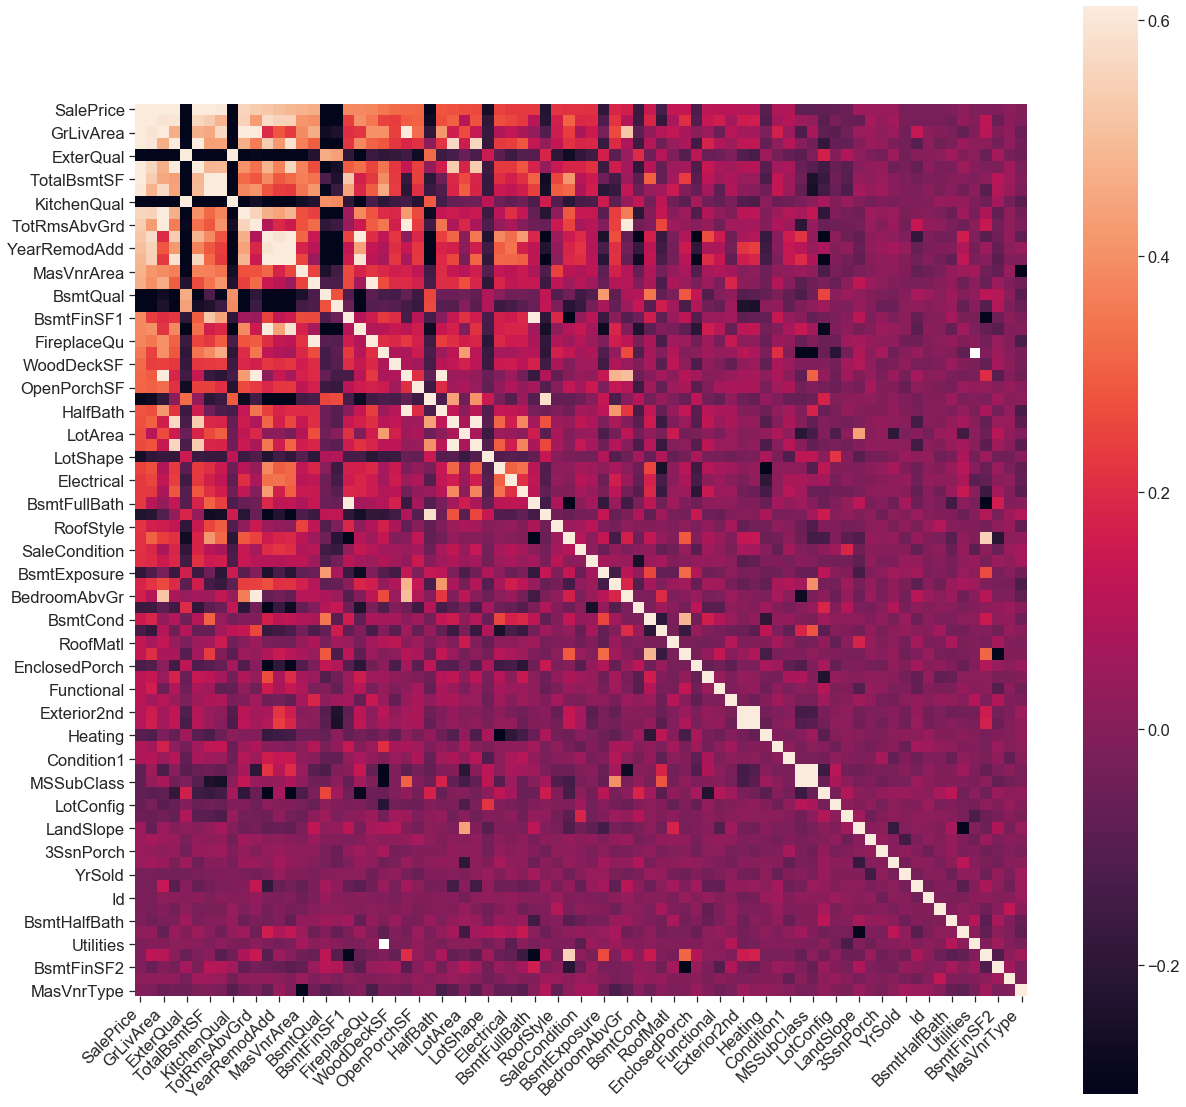

In [25]:
# Make a heatmap for corr defined in the previous cell.

fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(corr,
                 robust=True,
                 square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment="right");

In [26]:
# Check the column labels of the dataframe df_2_sorted
# to find the most important features of houses that affect the sale prices.

df_2_sorted.columns

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
       'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath',
       'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt',
       'MasVnrArea', 'Fireplaces', 'BsmtQual', 'HeatingQC', 'BsmtFinSF1',
       'Foundation', 'FireplaceQu', 'LotFrontage', 'WoodDeckSF', '2ndFlrSF',
       'OpenPorchSF', 'GarageFinish', 'HalfBath', 'GarageCond', 'LotArea',
       'GarageQual', 'LotShape', 'CentralAir', 'Electrical', 'PavedDrive',
       'BsmtFullBath', 'GarageType', 'RoofStyle', 'BsmtUnfSF', 'SaleCondition',
       'Neighborhood', 'BsmtExposure', 'HouseStyle', 'BedroomAbvGr',
       'MSZoning', 'BsmtCond', 'KitchenAbvGr', 'RoofMatl', 'BsmtFinType2',
       'EnclosedPorch', 'ExterCond', 'Functional', 'ScreenPorch',
       'Exterior2nd', 'Exterior1st', 'Heating', 'PoolArea', 'Condition1',
       'BldgType', 'MSSubClass', 'OverallCond', 'LotConfig', 'SaleType',
       'LandSlope', 'MoSold', '3SsnPorch', 'S

In [27]:
# *** Top 20 important features ***
# new_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
#              'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath',
#              'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'MasVnrArea',
#              'Fireplaces', 'BsmtQual', 'HeatingQC', 'BsmtFinSF1', 'Foundation',
#              'FireplaceQu']]


# *** Top 10 important features ***
# new_df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual',
#              'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'KitchenQual', 'FullBath',
#              'TotRmsAbvGrd']]


# *** Top 5 important features ***
new_df = df_2[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea']]
# Define the top 5 important fetures as new_df

In [28]:
# Check the correlation with each columns of the dataframe new_df and redefine it as corr.
# Print and check the corr.

corr = new_df.corr()

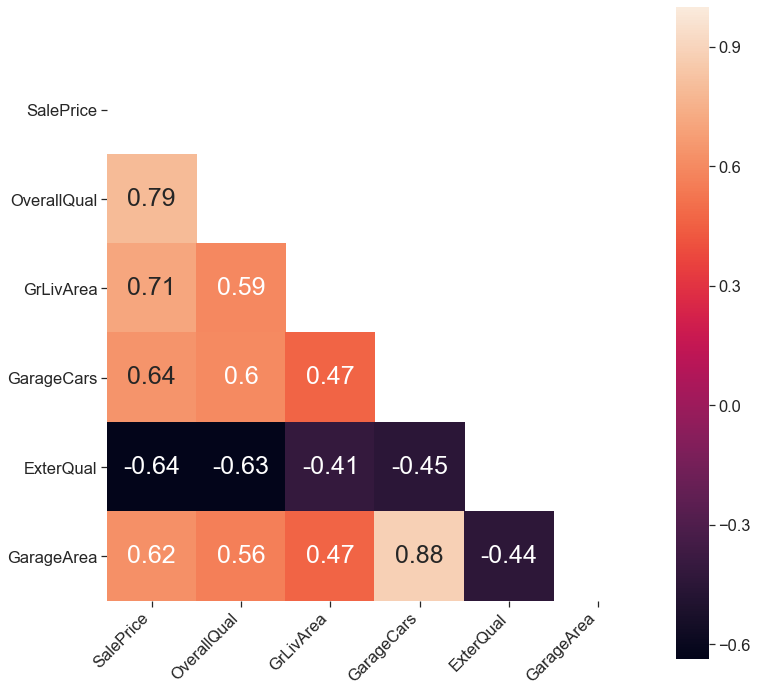

In [29]:
# Make a heatmap for corr defined in the previous cell.

fig, ax = plt.subplots(figsize=(12,12))

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    ax = sns.heatmap(corr,
                     robust=True,
                     annot=True,
                     annot_kws={"size": 25},
                     square=True,
                     mask=mask);

ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right');


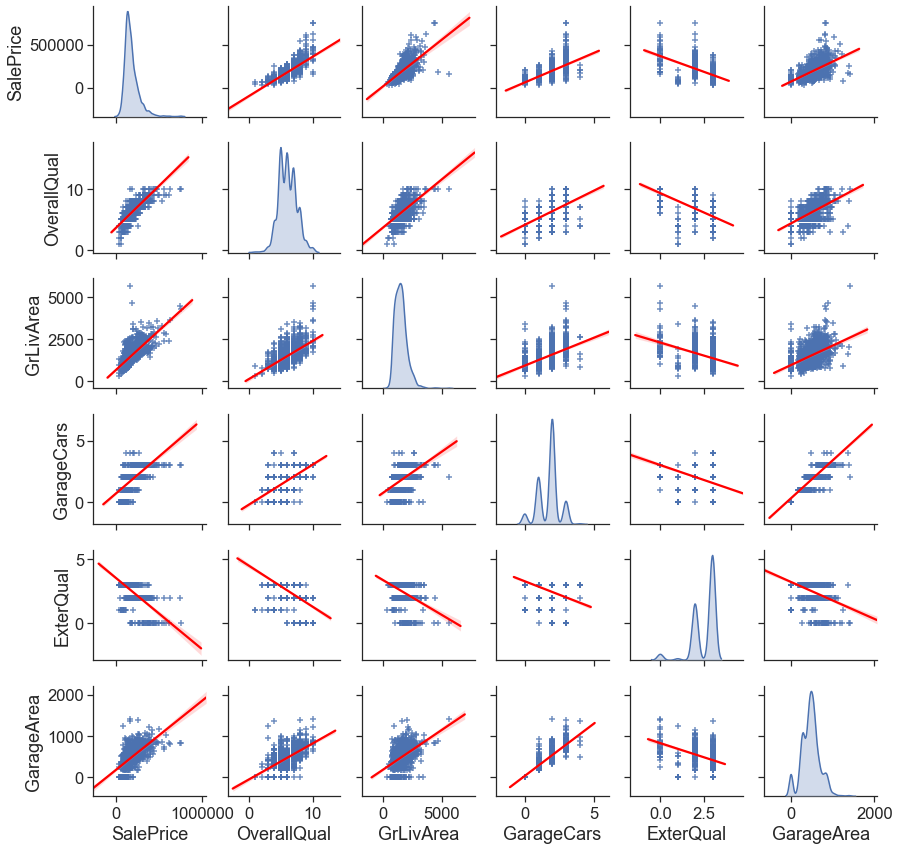

In [30]:
# Make a pairplot combined regplot for corr defined in the previous cell.

sns.pairplot(new_df,
             kind='reg',
             diag_kind='kde',
             markers='+',
             height=2,
             plot_kws={'line_kws':{'color':'red'}});

# plt.title("Correlation between SalePrice and other important features");

In [31]:
# Add constant
# Print OLS Regression Results

new_df = sm.add_constant(new_df)

y = new_df['SalePrice']
X = new_df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'ExterQual', 'GarageArea']]

price_factor = sm.OLS(y, X, missing='drop').fit()
price_factor.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          4.666e+33
Date:                Sun, 17 Nov 2019   Prob (F-statistic):                        0.00
Time:                        16:11:11   Log-Likelihood:                          32711.
No. Observations:                1460   AIC:                                 -6.541e+04
Df Residuals:                    1454   BIC:                                 -6.538e+04
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
SalePrice       1.0000   3.05e-17   3.28e+16      0.000       1.000       1.000
OverallQual -4.547e-13   1.15e-12     -0.396      0.692   -2.71e-12     1.8e-12
GrLivArea   -4.441e-16   3.21e-15     -0.138      0.890   -6.75e-15    5.86e-15
GarageCars  -1.819e-12   3.51e-12     -0.519      0.604    -8.7e-12    5.06e-12
ExterQual    2.728e-12   1.25e-12      2.181      0.029    2.75e-13    5.18e-12
GarageArea           0   1.19e-14          0      1.000   -2.34e-14    2.34e-14
==============================================================================
Omnibus:                      585.447   Durbin-Watson:                   0.293
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2761.246
Skew:                          -1.861   Prob(JB):                         0.00
Kurtosis:                       8.616   Cond. No.                     5.88e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.88e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
# df["OverallQual"].value_counts()
# df["GrLivArea"].value_counts()
# df["GarageCars"].value_counts()
# df["ExterQual"].value_counts()
# df["GarageArea"].value_counts()

In [33]:
df.loc[df["SalePrice"].idxmax(), ['OverallQual']]

OverallQual    10
Name: 691, dtype: object

In [34]:
df.loc[df["SalePrice"].idxmax(), ['GrLivArea']]

GrLivArea    4316
Name: 691, dtype: object

In [35]:
df.loc[df["SalePrice"].idxmax(), ['GarageCars']]

GarageCars    3
Name: 691, dtype: object

In [36]:
df.loc[df["SalePrice"].idxmax(), ['ExterQual']]

ExterQual    Ex
Name: 691, dtype: object

In [37]:
df.loc[df["SalePrice"].idxmax(), ['GarageArea']]

GarageArea    832
Name: 691, dtype: object